# USOPC Candidate Project
#### by Ana De Souza

#### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Loading the Dataset**

In [2]:
df = pd.read_excel('Load and Wellness Data.xlsx')

#### **View the first and the last 5 rows of the dataset**

In [3]:
df.head()

,Athlete,Date,Position,Load: Practice,Load: S&C,Load: Competition,Practice HR Avg,Practice HR Max,Distance,High Speed Distance,Accelerations,Decelerations,Sprints,Fatigue,Mood,Motivation,Soreness,Stress,Sleep
0,Athlete 2,2021-08-01,Position Group A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,67.0,87.0,13.0,16.0,84.0
1,Athlete 21,2021-08-01,Position Group A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,47.0,53.0,57.0,42.0,41.0
2,Athlete 4,2021-08-01,Position Group A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Athlete 5,2021-08-01,Position Group A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Athlete 1,2021-08-01,Position Group B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0,32.0,0.0,52.0,55.0


In [4]:
df.tail()

,Athlete,Date,Position,Load: Practice,Load: S&C,Load: Competition,Practice HR Avg,Practice HR Max,Distance,High Speed Distance,Accelerations,Decelerations,Sprints,Fatigue,Mood,Motivation,Soreness,Stress,Sleep
8287,Athlete 8,2022-06-30,Position Group C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8288,Athlete 9,2022-06-30,Position Group C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8289,Athlete 15,2022-06-30,Position Group D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8290,Athlete 19,2022-06-30,Position Group D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8291,Athlete 23,2022-06-30,Position Group D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
- Immediately we can identify that we are dealing with missing values
- We can also see that we have loads for practice, strength and conditioning, and competition
- Have only heart rate data from practices, however we might be able to gather this from the date if applicable
- We have different kinds of athletes and position group
- Position groups can imply that loads and wellness may vary by position

#### **Understand the shape of the dataset**

In [5]:
df.shape

(8292, 19)

In [6]:
df['Athlete'].value_counts()

Athlete 3     334
Athlete 25    334
Athlete 23    333
Athlete 2     332
Athlete 21    332
Athlete 15    332
Athlete 9     332
Athlete 8     332
Athlete 6     332
Athlete 18    332
Athlete 12    332
Athlete 24    332
Athlete 22    332
Athlete 20    332
Athlete 17    332
Athlete 16    332
Athlete 14    332
Athlete 13    332
Athlete 11    332
Athlete 10    332
Athlete 1     332
Athlete 5     332
Athlete 4     332
Athlete 19    331
Athlete 7     320
Name: Athlete, dtype: int64

**Observations**
- 8292 entries across 25 Athletes
- 19 different kinds of data
- Athlete 3 and 25 the most data
- Athlete 23 has the second most data
- Athlete 19 has the third most data
- Athlete 7 has the last amount of data by a significant amount when compared to the group

#### **Check the data types of the columns in the dataset**

In [7]:
df.info

<bound method DataFrame.info of          Athlete       Date          Position  Load: Practice  Load: S&C  \
0      Athlete 2 2021-08-01  Position Group A             NaN        NaN   
1     Athlete 21 2021-08-01  Position Group A             NaN        NaN   
2      Athlete 4 2021-08-01  Position Group A             NaN        NaN   
3      Athlete 5 2021-08-01  Position Group A             NaN        NaN   
4      Athlete 1 2021-08-01  Position Group B             NaN        NaN   
...          ...        ...               ...             ...        ...   
8287   Athlete 8 2022-06-30  Position Group C             NaN        NaN   
8288   Athlete 9 2022-06-30  Position Group C             NaN        NaN   
8289  Athlete 15 2022-06-30  Position Group D             NaN        NaN   
8290  Athlete 19 2022-06-30  Position Group D             NaN        NaN   
8291  Athlete 23 2022-06-30  Position Group D             NaN        NaN   

      Load: Competition  Practice HR Avg  Practice HR M

In [8]:
df.dtypes

Athlete                        object
Date                   datetime64[ns]
Position                       object
Load: Practice                float64
Load: S&C                     float64
Load: Competition             float64
Practice HR Avg               float64
Practice HR Max               float64
Distance                      float64
High Speed Distance           float64
Accelerations                 float64
Decelerations                 float64
Sprints                       float64
Fatigue                       float64
Mood                          float64
Motivation                    float64
Soreness                      float64
Stress                        float64
Sleep                         float64
dtype: object

**Observations**
- We are encountering with quite a few missing values. 
- This is because the athlete does not train nor does the same activity everyday.
- Something that we did notice is that there is no "Age" column

In [9]:
df.duplicated().sum()

0

#### **Exploratory Data Analysis**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Load: Practice,1425.0,124.689825,64.027299,0.0,77.00,121.0,171.00,350.00
Load: S&C,1145.0,37.572052,28.302350,0.0,20.00,31.0,46.00,288.00
Load: Competition,288.0,185.267361,62.427279,0.0,149.00,195.0,227.00,347.00
Practice HR Avg,1425.0,131.788070,27.616734,0.0,125.00,137.0,146.00,213.00
Practice HR Max,1425.0,188.299649,38.138120,0.0,181.00,191.0,204.00,239.00
Distance,2830.0,4744.092700,6518.680427,0.0,1515.65,3874.6,6531.60,237227.91
High Speed Distance,1530.0,634.865908,1383.463687,0.0,44.60,435.8,905.70,47058.70
Accelerations,1530.0,267.167320,192.104171,0.0,125.00,250.0,375.00,1276.00
Decelerations,1530.0,296.232680,207.019920,0.0,145.00,275.0,408.00,1372.00
Sprints,2815.0,14.563410,20.654865,0.0,0.00,6.0,22.00,156.00


**Observations**
- The range for Fatigue, Mood, Motivation, Soreness, Stress, and Sleep is from a scale 1-100
- Load range in general 0-350
- Heart rate max maximum is 239. Using this metric, we can divide them into Zones by increments of 20 bpm
- GPS data includes the standard distance, high speed distance, accelerations, decelerations, and sprints
- The max 'Distance' is a 6 figure number which is a bit extreme when compared to the rest of the quartiles
- The standard deviation for both 'High Speed Distance' and 'Distance' are very big which does not seem correct at all

##### **Loads by Practice, Comptition, and S&C**

Load: Practice
Skew : 0.14


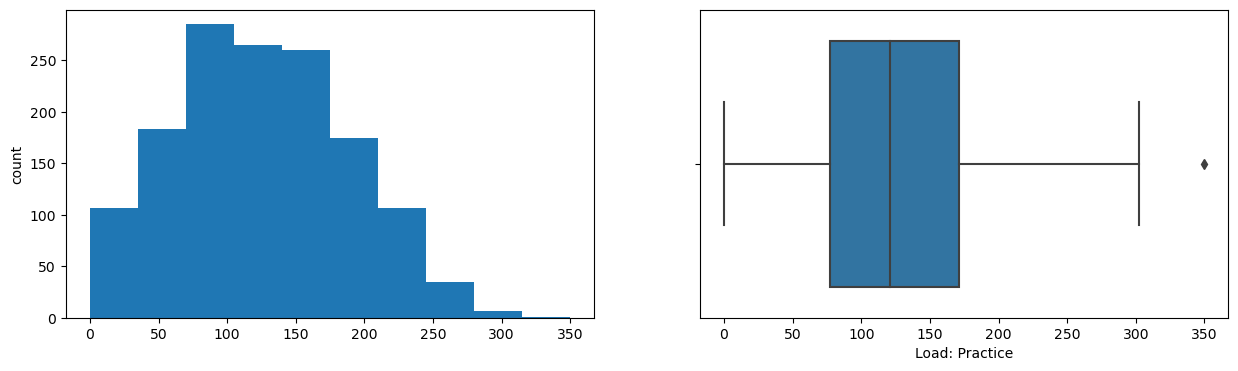

Load: Competition
Skew : -0.51


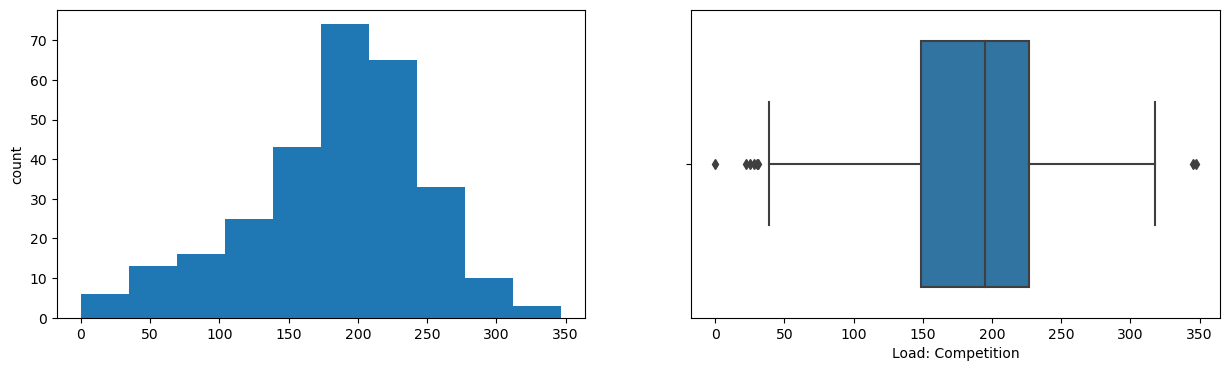

Load: S&C
Skew : 2.25


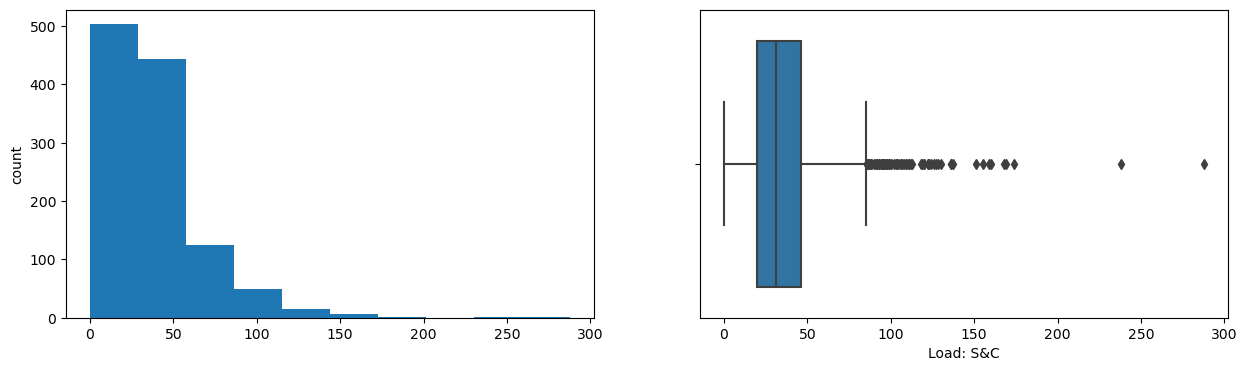

In [11]:
for col in ['Load: Practice', 'Load: Competition','Load: S&C']:
    print(col)
    print('Skew :',round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    
    plt.show()

**Observations**
- Both practice a competition loads are skewed respectively to their effort/competition nature
- We do see a few outliers at "0" 
- Loads for strength and conditioning are severely left skewed

Practice HR Avg
Skew : -3.11


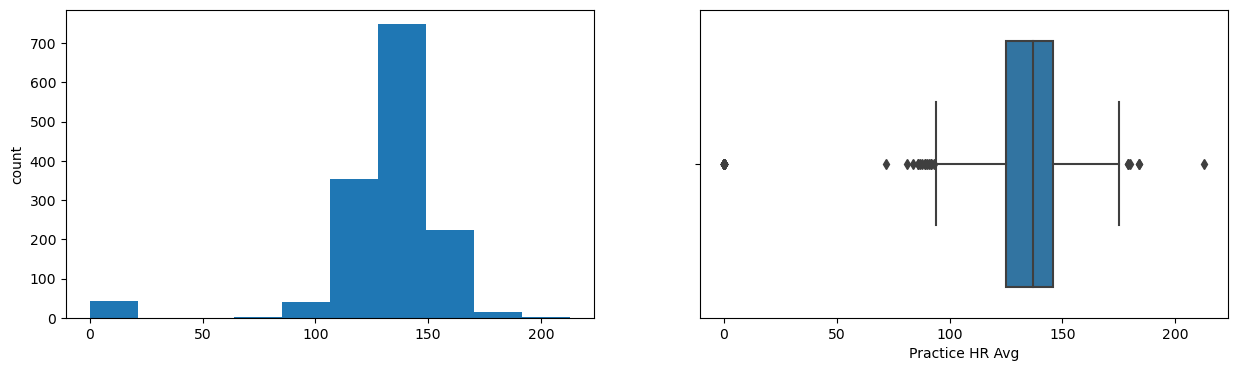

Practice HR Max
Skew : -3.4


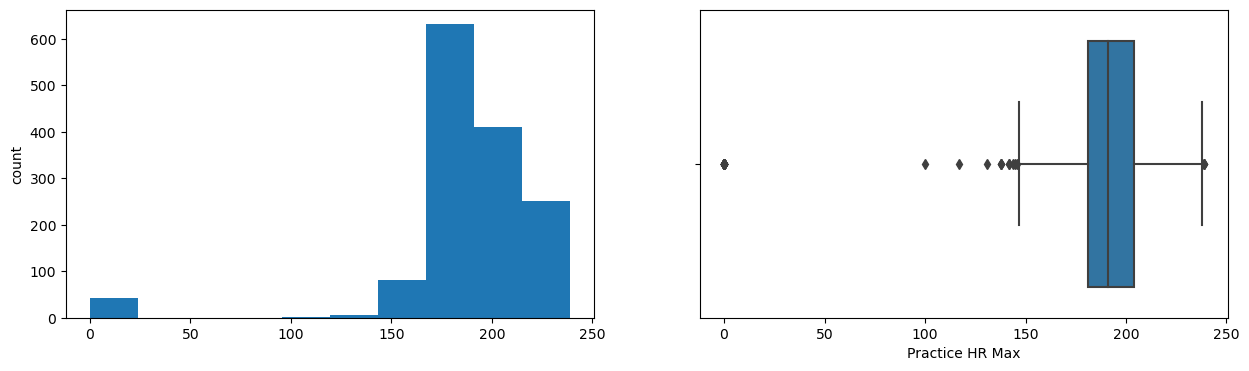

In [12]:
for col in ['Practice HR Avg','Practice HR Max']:
    print(col)
    print('Skew :',round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    
    plt.show()

**Observations**
- We do see a few outliers at "0" 

Distance
Skew : 17.14


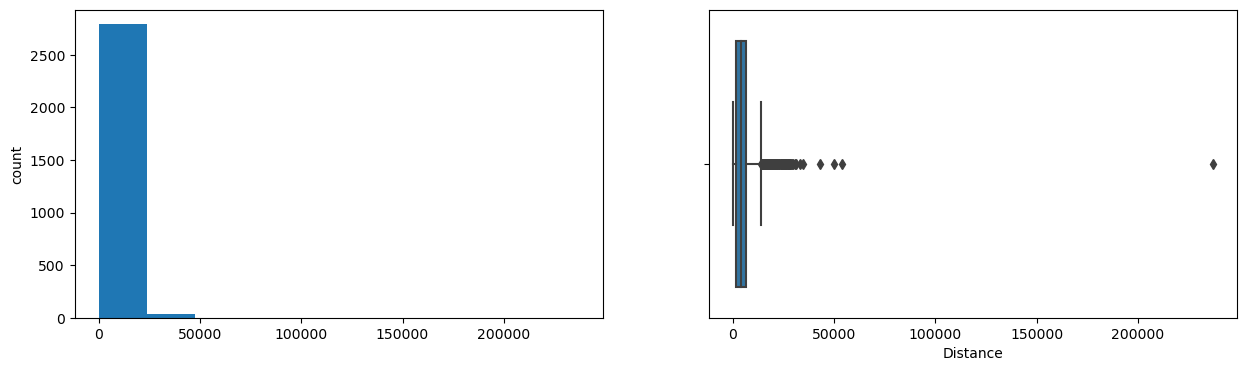

High Speed Distance
Skew : 25.08


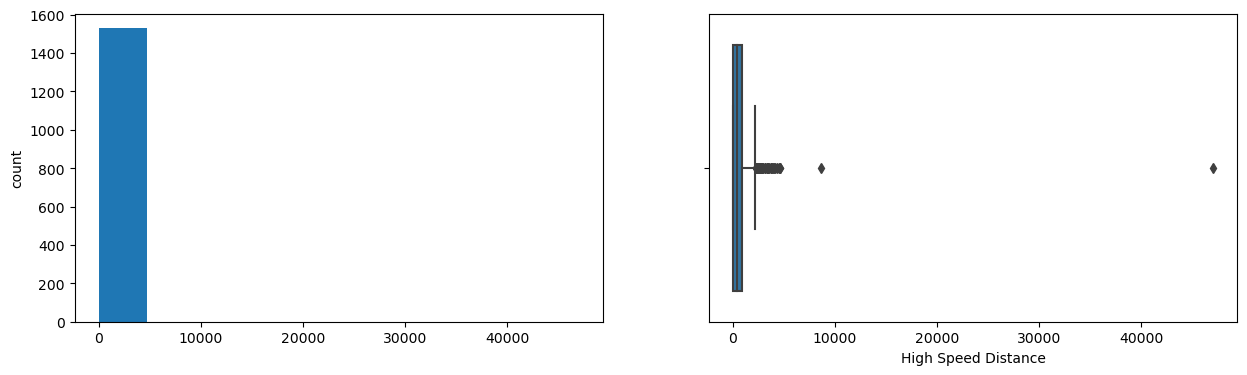

Accelerations
Skew : 1.17


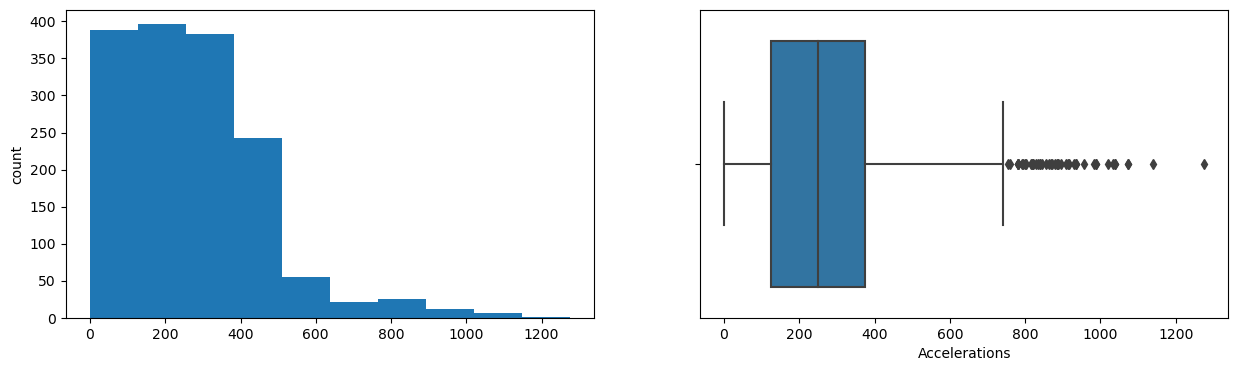

Decelerations
Skew : 1.2


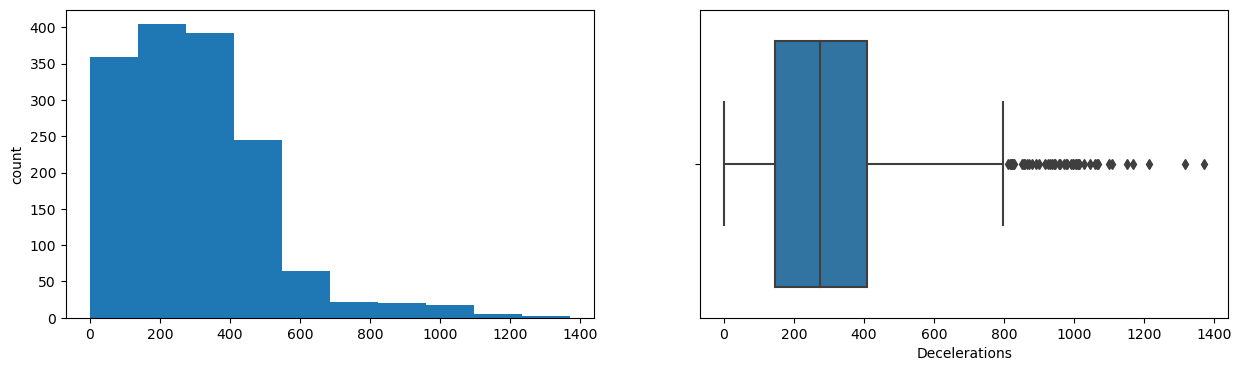

Sprints
Skew : 2.27


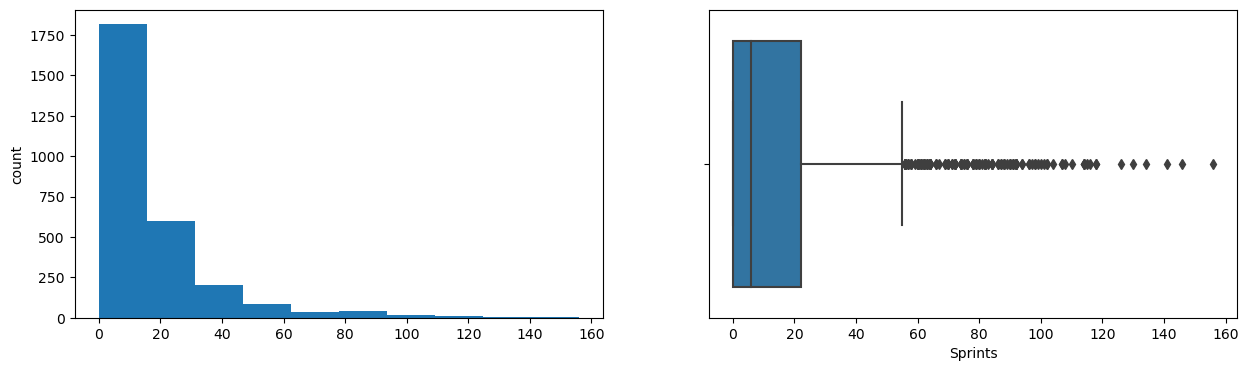

In [13]:
for col in ['Distance','High Speed Distance','Accelerations','Decelerations','Sprints']:
    print(col)
    print('Skew :',round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    
    plt.show()

**Observations**
- We do see quite a few outliers which we can filter out at the individual level by "athlete" or "position group" to get a more accurate distribution
- We can also drop some of the extreme values since it seems like it is only one entry causing this extreme skew for 'Distance' and 'High Speed Distance'
- There are a lot of '0' values for 'Sprints' which could adjust the range from 0-XX to 1-XX to get a better visual

Fatigue
Skew : 0.22


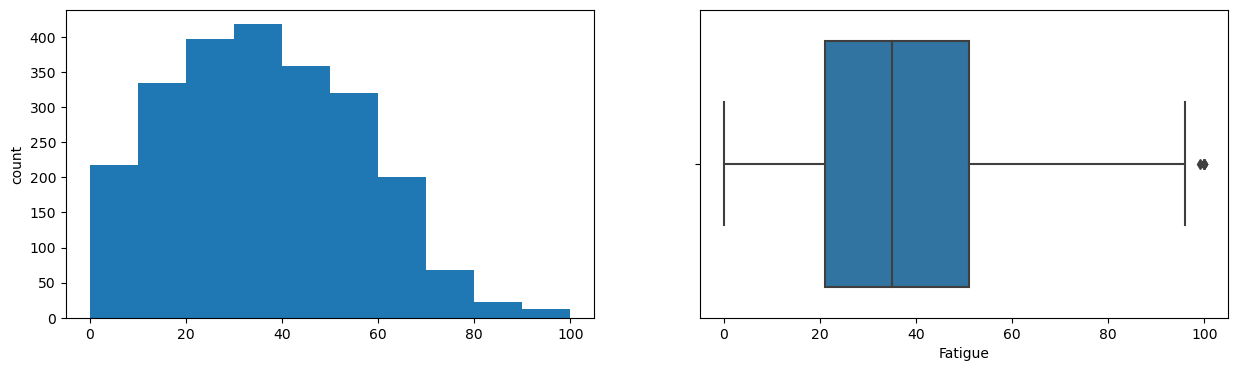

Mood
Skew : -0.16


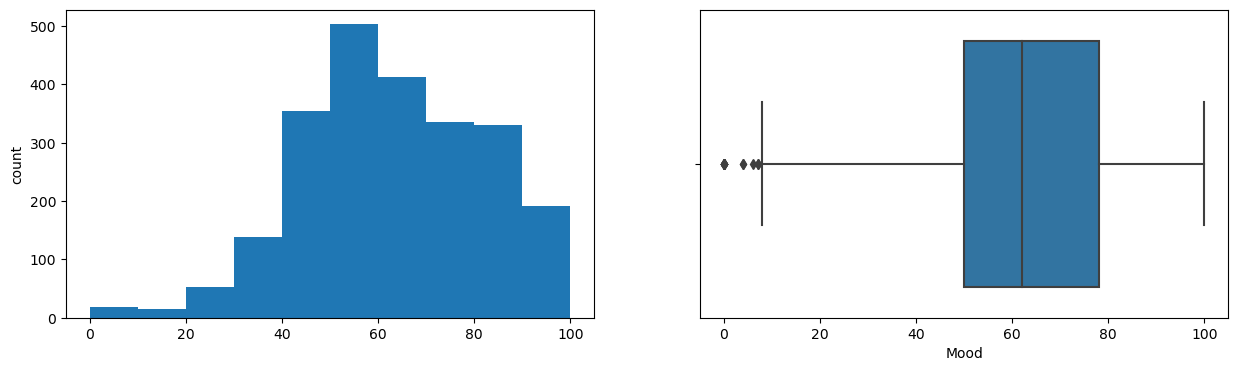

Motivation
Skew : -0.45


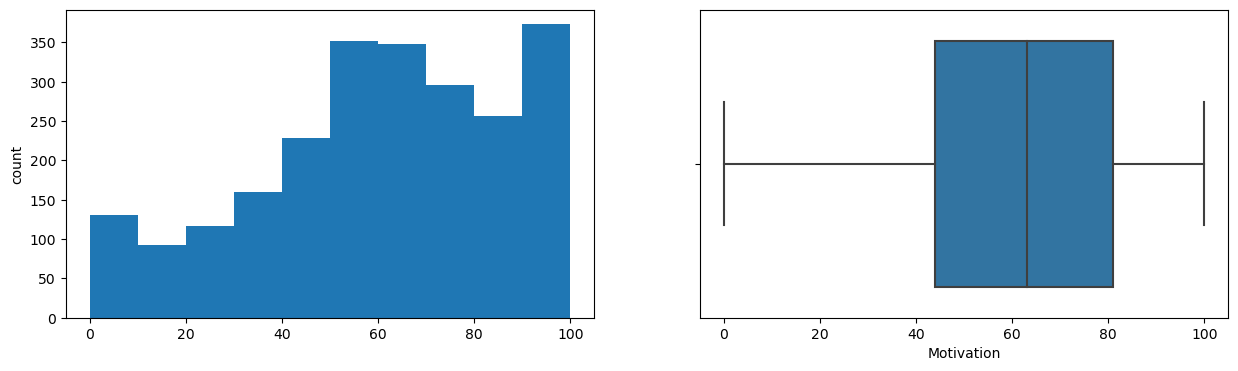

Soreness
Skew : 0.19


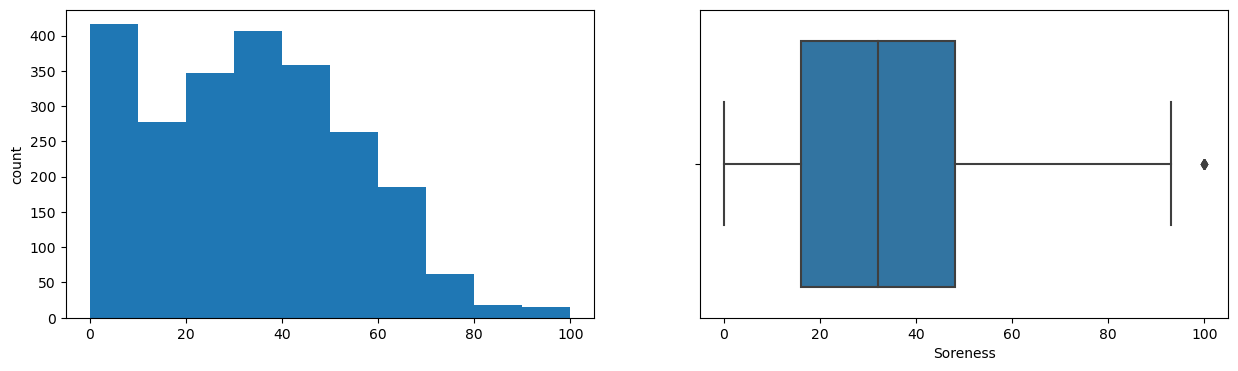

Stress
Skew : 0.38


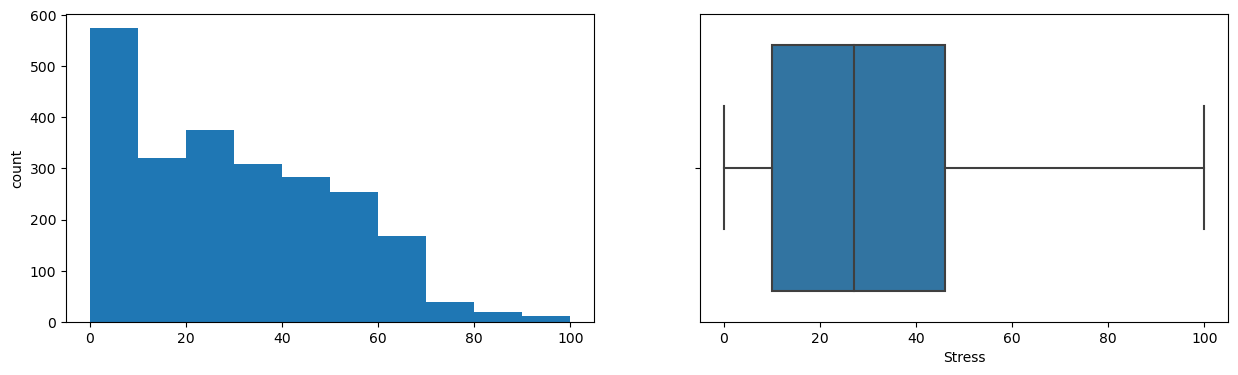

Sleep
Skew : -0.29


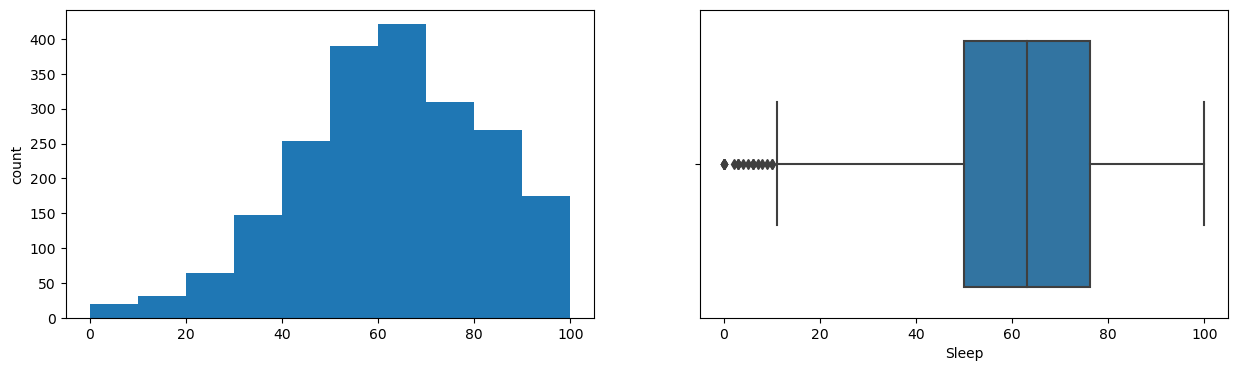

In [14]:
for col in ['Fatigue','Mood','Motivation','Soreness','Stress','Sleep']:
    print(col)
    print('Skew :',round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    
    plt.show()

**Observations**
- We do see quite a few outliers which we can filter out at the individual level by "athlete" or "position group" to get a more accurate distribution

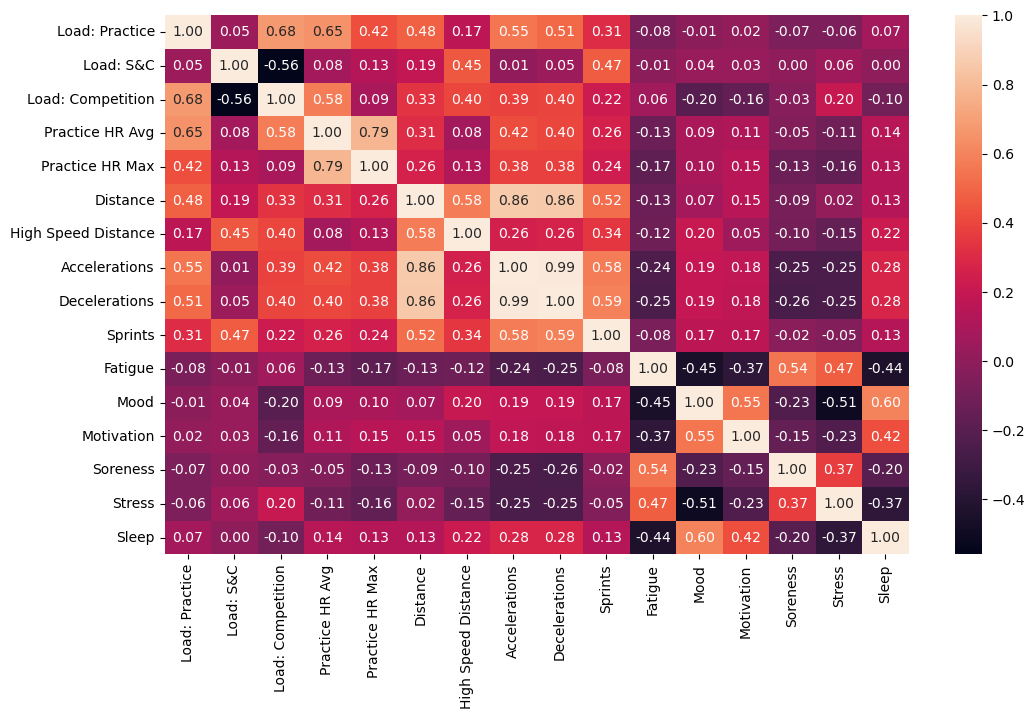

In [15]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

**Observations**
- The strongest correlations comes from those of the sample category/data source from the GPS/wearable
- Acceleration and decelationation have a strong relationship given that they are direct GPS variables
- We do not see anyother correlations between the self-reported variable and GPS/wearable
- Mood and sleep, mood and motivation are the strongest correlation that is not directly related in the same action

#### **Next Steps and Solution Design**

- Use a BI tool to visualize data and filter them by athlete, performance group, and date
- Create visualization that will best display different metrics from GPS wearables and self-reported surveys
- Consider omitting extreme value and null values using the BI tool